
# Определение стоимости автомобилей

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка" data-toc-modified-id="Загрузка-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Предобработка</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Обучение-Dummy-модели" data-toc-modified-id="Обучение-Dummy-модели-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обучение Dummy-модели</a></span></li><li><span><a href="#Обучение-модели-линейной-регрессии" data-toc-modified-id="Обучение-модели-линейной-регрессии-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение модели линейной регрессии</a></span></li><li><span><a href="#Обучение-модели-случайного-леса" data-toc-modified-id="Обучение-модели-случайного-леса-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение модели случайного леса</a></span></li><li><span><a href="#Обучение-модели-CatBoost" data-toc-modified-id="Обучение-модели-CatBoost-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Обучение модели CatBoost</a></span></li><li><span><a href="#Обучение-модели-LightGBM" data-toc-modified-id="Обучение-модели-LightGBM-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Обучение модели LightGBM</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоги исследования</a></span></li></ul></div>

## Введение

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. 

**Исходные данные:** технические характеристики, комплектации и цены автомобилей. 

**Описание данных:**

Данные находятся в файле `/datasets/autos.csv`

Признаки:

* `DateCrawled` — дата скачивания анкеты из базы
* `VehicleType` — тип автомобильного кузова
* `RegistrationYear` — год регистрации автомобиля
* `Gearbox` — тип коробки передач
* `Power` — мощность (л. с.)
* `Model` — модель автомобиля
* `Kilometer` — пробег (км)
* `RegistrationMonth` — месяц регистрации автомобиля
* `FuelType` — тип топлива
* `Brand` — марка автомобиля
* `NotRepaired` — была машина в ремонте или нет
* `DateCreated` — дата создания анкеты
* `NumberOfPictures` — количество фотографий автомобиля
* `PostalCode` — почтовый индекс владельца анкеты (пользователя)
* `LastSeen` — дата последней активности пользователя
* `Price` — цена (евро)



**Цель** - построить модель машинного обучения для определения стоимости автомобиля с учетом требований заказчика (скорость, качество предсказаний, время обучения)

**Задачи:**

1.	Загрузите и подготовьте данные.
2.	Обучите разные модели. Для каждой попробуйте различные гиперпараметры.
3.	Проанализируйте скорость работы и качество моделей.
4. Подвести итоги исследования.

**Примечания:**

* Для оценки качества моделей применяйте метрику RMSE.
* Самостоятельно освойте библиотеку LightGBM и её средствами постройте модели градиентного бустинга.
* Время выполнения ячейки кода Jupyter Notebook можно получить специальной командой. Найдите её.
* Поскольку модель градиентного бустинга может обучаться долго, измените у неё только два-три параметра.
* Если перестанет работать Jupyter Notebook, удалите лишние переменные оператором del:
 
Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Загрузка и подготовка данных

### Загрузка

In [1]:
# установим и импортируем необходимые бибилиотеки
!pip install lightgbm
!pip install catboost
!pip install missingno

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

In [2]:
# прочитаем данные из файла /datasets/autos.csv
data = pd.read_csv('/datasets/autos.csv') # 

df = data.copy()
# выведем основную информацию на экран
df.info()
display(df.describe())
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


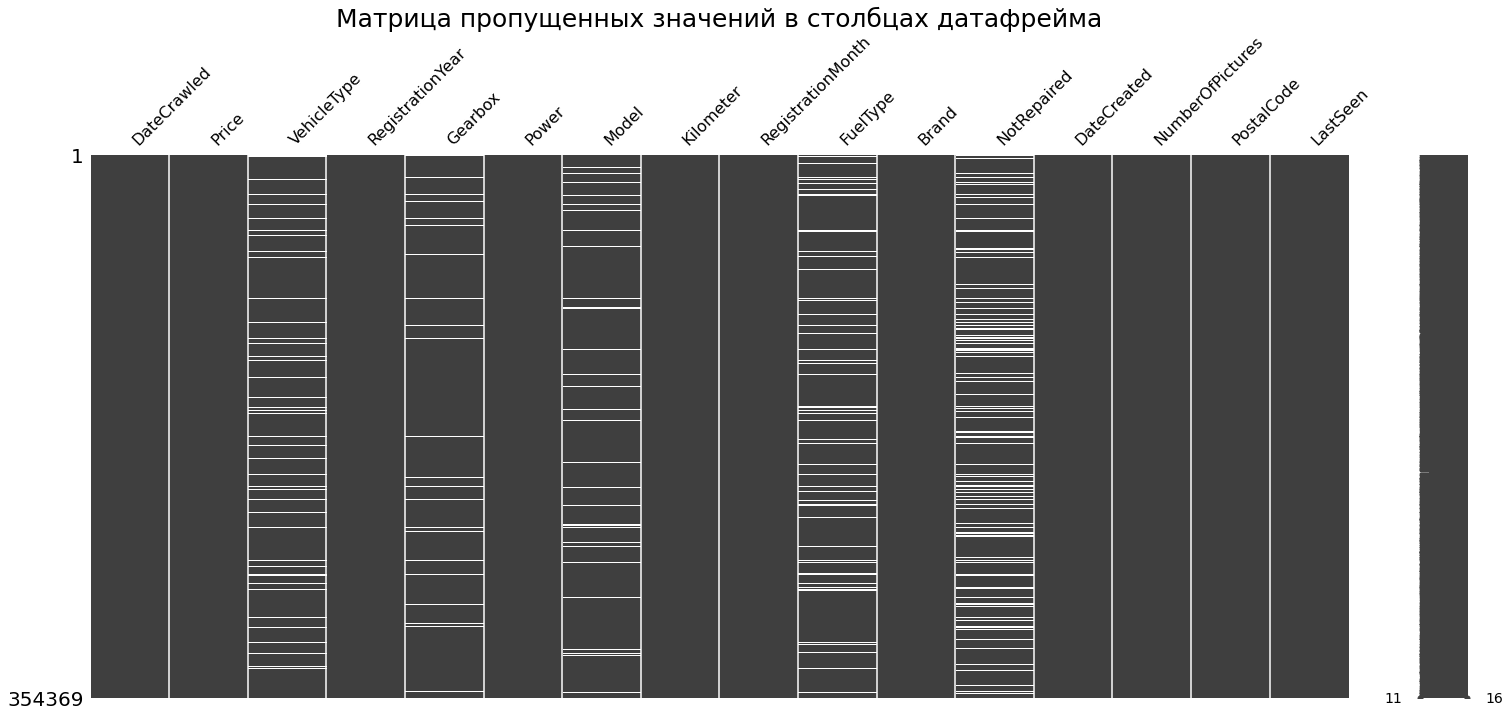

In [3]:
# визуализируем пропущенные значения с помощью инструментов библиотеки missingno
msno.matrix(df)
plt.title('Матрица пропущенных значений в столбцах датафрейма', size=25)
plt.show()

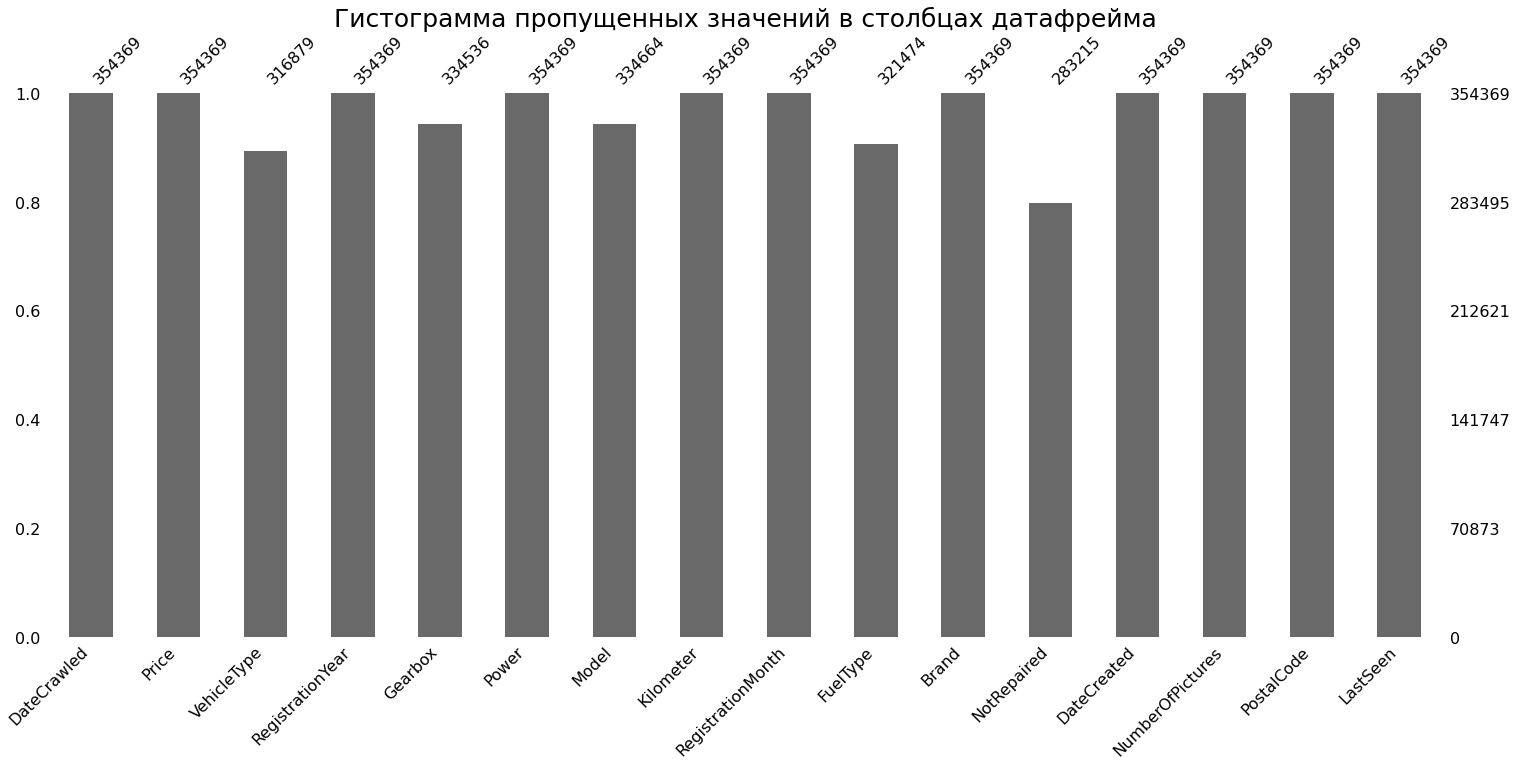

In [4]:
msno.bar(df)
plt.title('Гистограмма пропущенных значений в столбцах датафрейма', size=25)
plt.show()

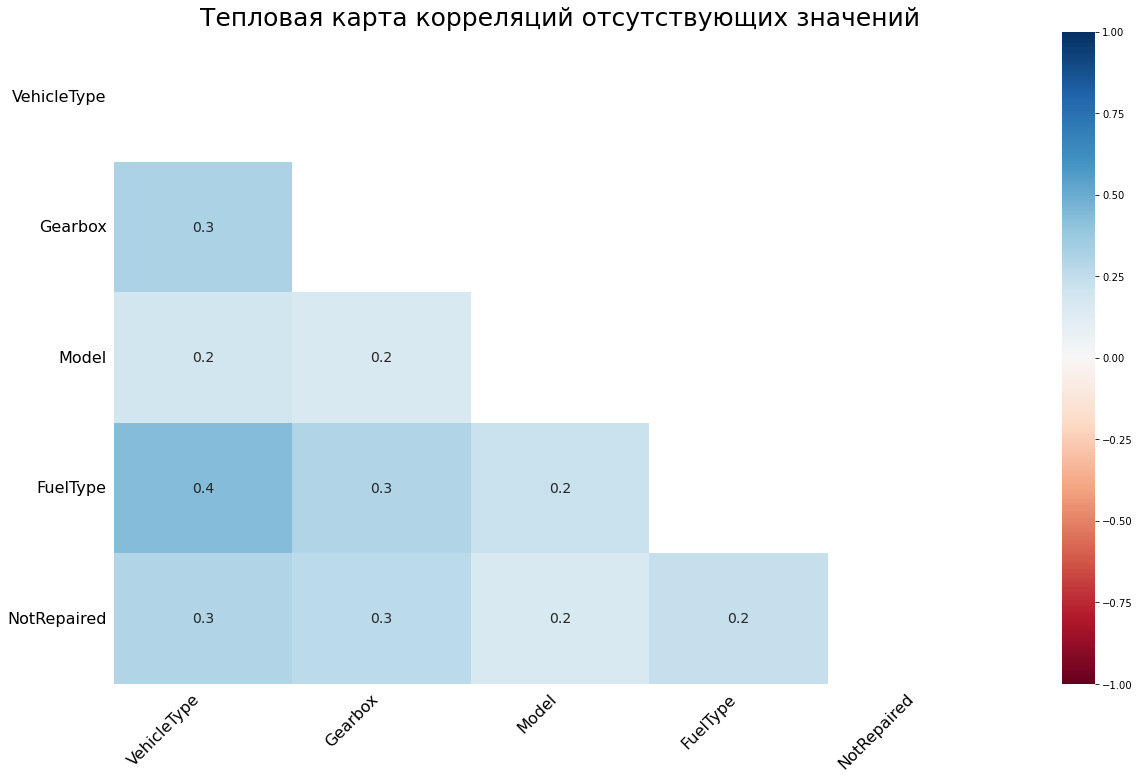

In [5]:
msno.heatmap(df)
plt.title('Тепловая карта корреляций отсутствующих значений', size=25)
plt.show()

**Промежуточный итог:**
* приведем регистр заголовков к "змеиному"
* столбцы с датами (DateCrawled, DateCreated, LastSeen) не помогут в построении модели. Предлагаем удалить их;
* столбец `numberofpictures` пустой. Удалим;
* в данных есть пропуски, работать с ними будем в следующем порядке:
    
    1) пропуски в `notrepaired` логично заменить на `yes`, т.к. при отсутствии значений машина не ремонтировалась;
    
    2) пропуски в `model` заменим на `other`, т.к. восстановисть достоверно нельзя;
    
    3) пропуски в `vehicletype` заменим по наиболее часто попадающимся параметрам 'vehicletype' для каждой модели машины;
    
    4) тепловая карта корреляций отсутствующих значений показала небольшую связь параметров `gearbox` и `fueltype` с `vehicletype` (0.3 и 0.4 соответственно). Предлагаем заменить пропуски в столбцах `gearbox` и `fueltype` наиболее часто встречающимися параметрами для каждого `vehicletype`
    
 
* столбец с данными `RegistrationYear` имеет минимальный и максимальный год 1000 и 9999 соответственно, а `Power` (мощность (л. с.)) - 20000 л. с., что не может быть. Необходимо более детально изучить данные в столбцах, при необходимости исключить строки с некорректными даннными. Для этого построим диаграмму размаха и удалим выбросы при необходимости;
* проведем анализ категориальных переменных и преобразуем их методом Ordinal encoding.

### Предобработка

* приведем регистр заголовков к "змеиному"

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['datecrawled', 'price', 'vehicletype', 'registrationyear', 'gearbox',
       'power', 'model', 'kilometer', 'registrationmonth', 'fueltype', 'brand',
       'notrepaired', 'datecreated', 'numberofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

* удалим столбцы 'numberofpictures', 'datecrawled', 'datecreated', 'lastseen'

In [7]:
df.drop(labels=['numberofpictures', 'datecrawled', 'datecreated', 'lastseen'], axis=1, inplace=True)

* работа с пропусками

In [8]:
# 1) пропуски в notrepaired логично заменить на yes, т.к. при отсутствии значений машина не ремонтировалась;
df['notrepaired'].fillna('yes', inplace=True)

# 2) пропуски в model заменим на other, т.к. восстановисть достоверно нельзя;
df['model'].fillna('other', inplace=True)

In [9]:
# 3) пропуски в vehicletype заменим по наиболее часто попадающимся параметрам 'vehicletype' для каждой модели машины;

# для этого подготовим таблицу, в которую запишем наиболее часто попадающиеся 'vehicletype' для каждой 'model'
top_vehicletype = (df[['model', 'vehicletype']]
                   .value_counts()
                  .reset_index()
                  .drop_duplicates(subset='model'))
top_vehicletype.drop(0, axis=1, inplace=True)       # удалим ненужный столбец
top_vehicletype                                     # выведем на экран

,model,vehicletype
0,golf,sedan
1,corsa,small
2,polo,small
3,other,sedan
4,3er,sedan
...,...,...
768,serie_3,suv
816,kalina,sedan
820,range_rover_evoque,suv
1064,rangerover,suv


In [10]:
# заполним пропуски в столбце 'vehicletype' данными из таблицы top_vehicletype
df.loc[df['vehicletype'].isna(), 'vehicletype'] =  \
    df.loc[df['vehicletype'].isna(), 'model'].map(top_vehicletype.groupby('model')['vehicletype'].first())

In [11]:
# 4) заменим пропуски в столбцах `gearbox` и `fueltype` наиболее часто встречающимися параметрами 
#    для каждого `vehicletype` и `model`

# для этого подготовим таблицу, в которую запишем наиболее часто попадающиеся `gearbox` для каждой `vehicletype`
top_gear = (df[['vehicletype', 'gearbox']]
                 .value_counts()
                 .reset_index()
                 )
top_gear.drop(0, axis=1, inplace=True)       # удалим ненужный столбец
display(top_gear)                                     # выведем на экран

# для этого подготовим таблицу, в которую запишем наиболее часто попадающиеся `fueltype` для каждой `vehicletype`
top_fuel = (df[['vehicletype', 'fueltype']]
                 .value_counts()
                 .reset_index()
                 )
top_fuel.drop(0, axis=1, inplace=True)       # удалим ненужный столбец
display(top_fuel)                                     # выведем на экран

,vehicletype,gearbox
0,sedan,manual
1,small,manual
2,wagon,manual
3,bus,manual
4,sedan,auto
5,wagon,auto
6,convertible,manual
7,coupe,manual
8,suv,manual
9,small,auto


,vehicletype,fueltype
0,small,petrol
1,sedan,petrol
2,wagon,gasoline
3,wagon,petrol
4,sedan,gasoline
5,bus,gasoline
6,convertible,petrol
7,coupe,petrol
8,bus,petrol
9,small,gasoline


In [12]:
# заполним пропуски в столбце `gearbox` данными из таблицы top_gear   
df.loc[df['gearbox'].isna(), 'gearbox'] =  \
    df.loc[df['gearbox'].isna(), 'vehicletype'].map(top_gear.groupby('vehicletype')['gearbox'].first())

# заполним пропуски в столбце `fueltype` данными из таблицы top_fuel   
df.loc[df['fueltype'].isna(), 'fueltype'] =  \
    df.loc[df['fueltype'].isna(), 'vehicletype'].map(top_fuel.groupby('vehicletype')['fueltype'].first())

In [13]:
# проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              354369 non-null  int64 
 1   vehicletype        354369 non-null  object
 2   registrationyear   354369 non-null  int64 
 3   gearbox            354369 non-null  object
 4   power              354369 non-null  int64 
 5   model              354369 non-null  object
 6   kilometer          354369 non-null  int64 
 7   registrationmonth  354369 non-null  int64 
 8   fueltype           354369 non-null  object
 9   brand              354369 non-null  object
 10  notrepaired        354369 non-null  object
 11  postalcode         354369 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 32.4+ MB


* построим Boxplot для столбцов с числовым форматом данных `int64`

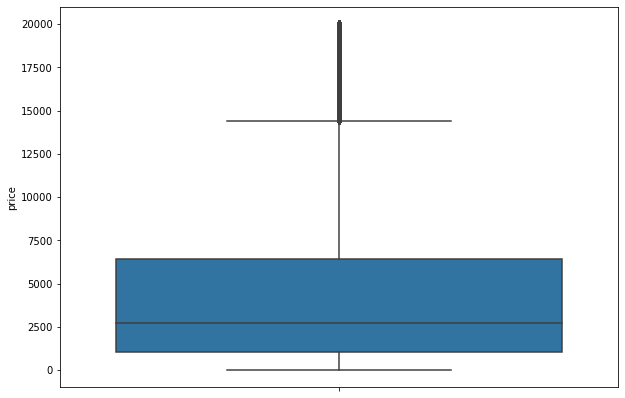

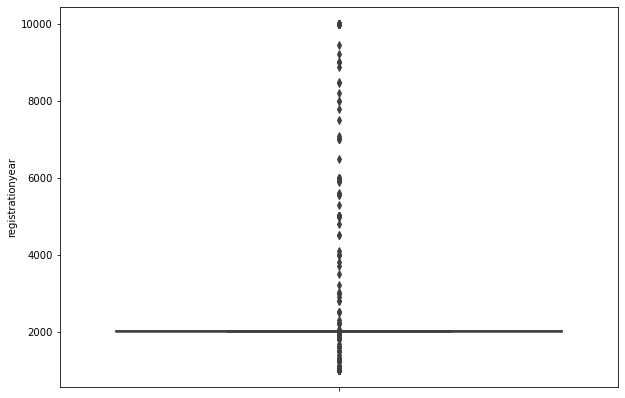

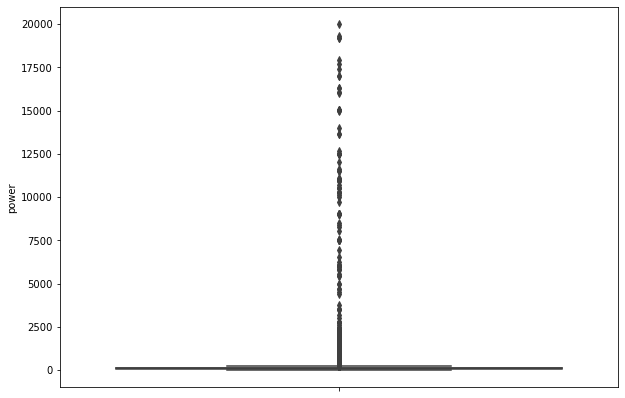

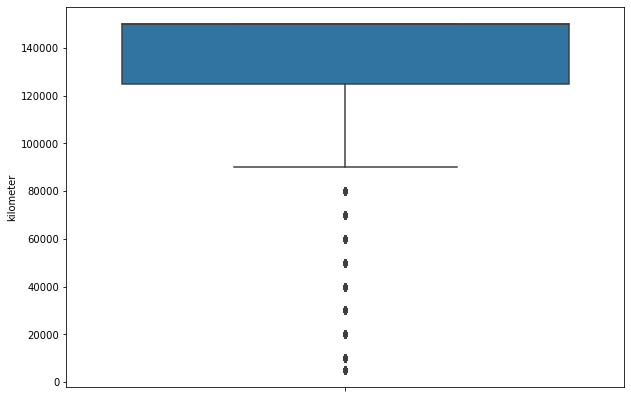

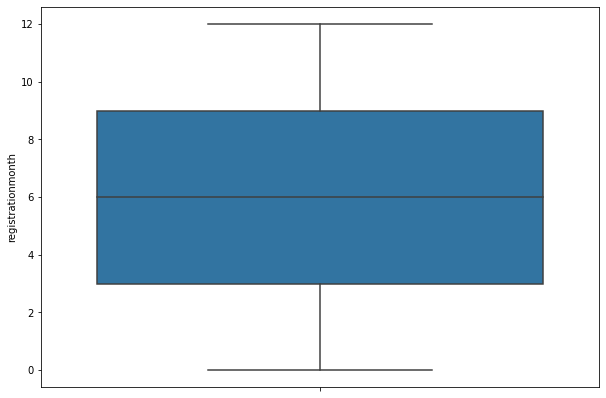

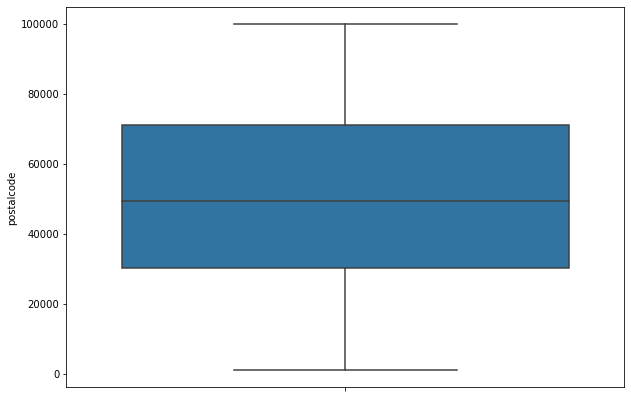

In [14]:
for col in df.columns:
    if df[col].dtype == 'int64':
        plt.figure(figsize=(10,7))
        figure = sns.boxplot(data=df, y=df[col])# выводим данные по столбцу col
        plt.show()

* в столбцах 'price', 'power', 'registrationyear' наблюдается множество выбросов. 
* в столбце 'kilometer' медиана, 3 квартиль и максимальное значения совпадают.

Рассмотрим распределение объявлений по году регистрации авто с помощью гистограммы: 

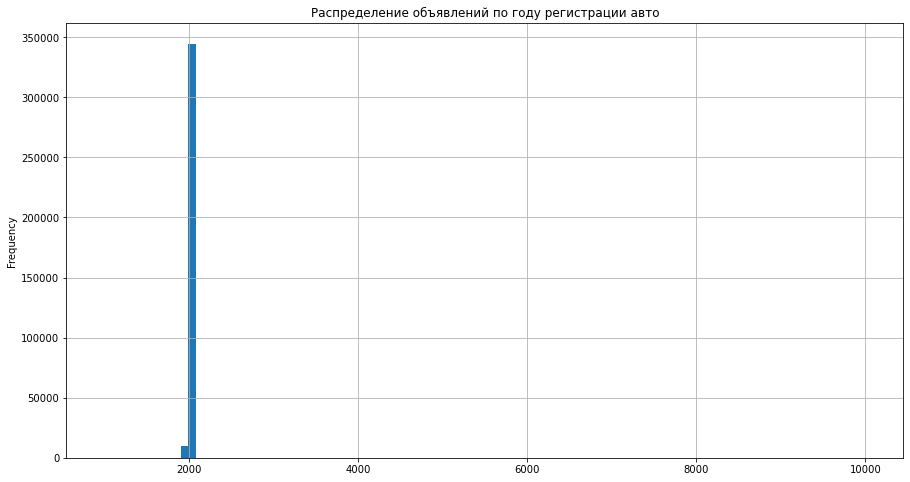

In [15]:
df['registrationyear'].plot(kind='hist',
                            grid=True,
                            figsize=(15,8),
                            bins=100,
                            title='Распределение объявлений по году регистрации авто')
plt.show()

Из-за большого кол-ва выбросов видим один столбец. Чтобы увидеть более четкую картину, ограничим даты регистрации авто "разумными" рамками между 1945 и 2022 годом. Рамки обусловлены тем, что мы строим модель для "стандартного" автомобиля, а машины, выпуском ранее 1945 года и "из будущего" (позже 2022г.в.) Снова построим гистограмму: 

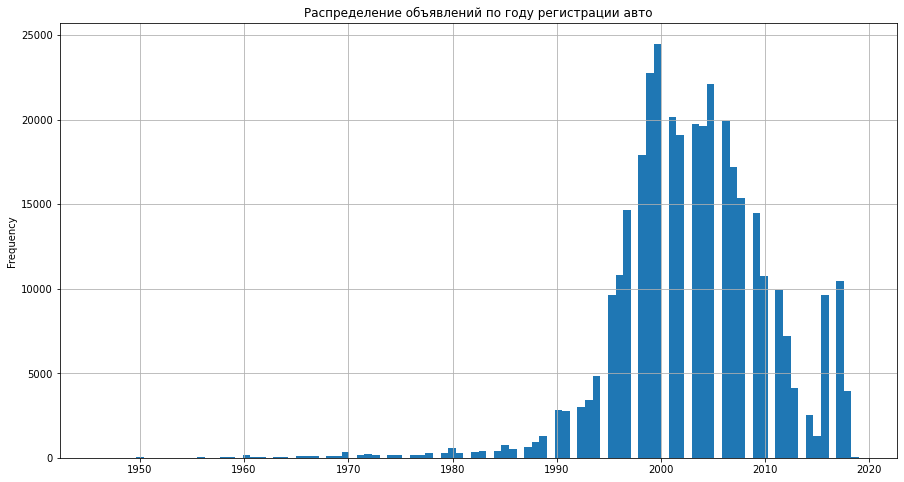

In [16]:
df.query('1945<registrationyear<2022')['registrationyear'].plot(kind='hist',
                                                                grid=True,
                                                                figsize=(15,8),
                                                                bins=100,
                                                                title='Распределение объявлений по году регистрации авто')
plt.show()

Видим, что большинство автомобилей имеет регистрацию после 1990 года. Предлагаем ограничить наш датафрейм 1990 и 2022 годами. 

In [17]:
df = df.query('1990<registrationyear<2022').reset_index(drop=True)

Рассмотрим модели, мощность которых выходит за пределы нормального распределения ("усов") выборки:

In [18]:
# посмотрим на машины, регистрация которых указана до 1990 гг и свыше 2022гг
print('Авто мощностью до 69 л.с.')
display(df.query('power<69'))

print('Авто мощностью свыше 254 л.с.')
display(df.query('power>254'))

Авто мощностью до 69 л.с.


,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,notrepaired,postalcode
0,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,yes,70435
14,300,small,2016,manual,60,polo,150000,0,petrol,volkswagen,yes,38871
21,450,small,1997,manual,50,arosa,150000,5,petrol,seat,no,9526
25,690,small,2003,manual,60,punto,150000,3,petrol,fiat,no,86199
27,899,small,2016,manual,60,clio,150000,6,petrol,renault,yes,37075
...,...,...,...,...,...,...,...,...,...,...,...,...
341778,1490,small,1998,manual,50,lupo,150000,9,petrol,volkswagen,no,48653
341780,3999,wagon,2005,manual,3,3er,150000,5,gasoline,bmw,no,81825
341783,1150,bus,2000,manual,0,zafira,150000,3,petrol,opel,no,26624
341784,0,sedan,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2694


Авто мощностью свыше 254 л.с.


,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,notrepaired,postalcode
35,7500,sedan,2002,auto,306,e_klasse,150000,4,petrol,mercedes_benz,yes,33649
53,1,suv,1994,manual,286,other,150000,11,gasoline,sonstige_autos,yes,53721
106,6300,sedan,2002,manual,265,golf,150000,3,petrol,volkswagen,no,56759
117,1800,sedan,1995,auto,286,7er,150000,12,petrol,bmw,yes,77866
162,19750,convertible,2006,manual,305,mustang,50000,7,petrol,ford,no,38350
...,...,...,...,...,...,...,...,...,...,...,...,...
341686,399,other,1994,manual,1103,3er,150000,0,gasoline,bmw,yes,56235
341707,6500,sedan,1993,auto,286,5er,150000,1,petrol,bmw,no,81249
341728,16999,wagon,2008,auto,269,a6,150000,7,gasoline,audi,no,61440
341757,11500,sedan,2004,auto,445,7er,125000,0,petrol,bmw,yes,4107


Из первой таблицы видно, что среди авто мощностью до 69 л.с. много машин с пробегом 150 тыс.км. Возможно, они продаются на запчасти или просто битые.

Вторая таблица - Авто мощностью свыше 254 л.с. Здесь представлены, в основном, мощные гоночные автомобили. Предлагаем ограничить диапазон до 500 л.с. Остальные - слишком выбивающие из выборки, нестандартные авто.

In [19]:
df = df.query('power<500').reset_index(drop=True)

Повторно построим Boxplot и посмотрим на распределение параметров:

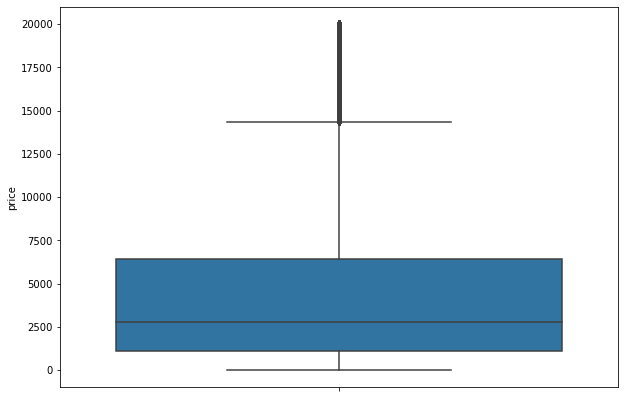

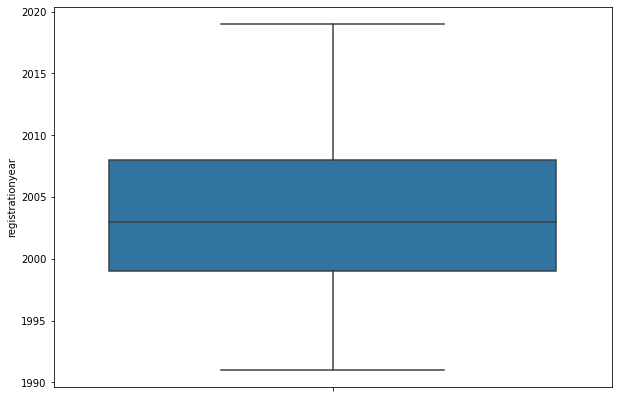

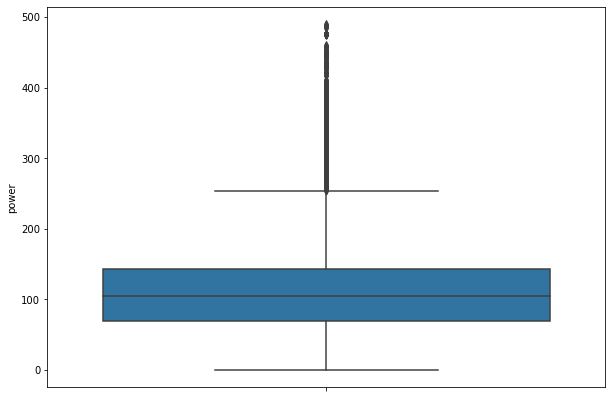

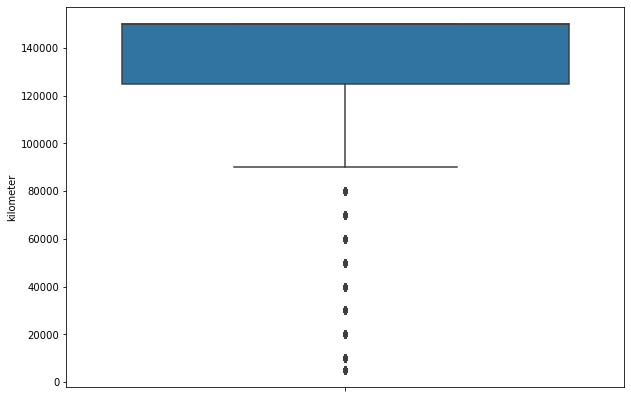

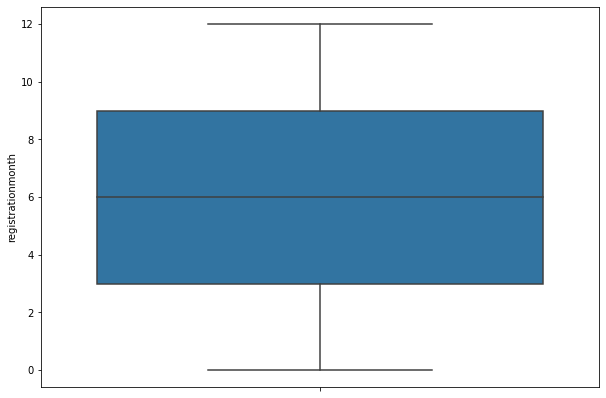

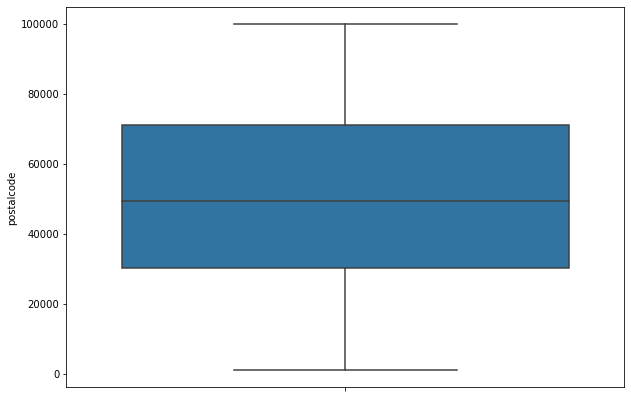

In [20]:
for col in df.columns:
    if df[col].dtype == 'int64':
        plt.figure(figsize=(10,7))
        figure = sns.boxplot(data=df, y=df[col])# выводим данные по столбцу col
        plt.show()

Посмотрим на распределение объявлений по пробегу:

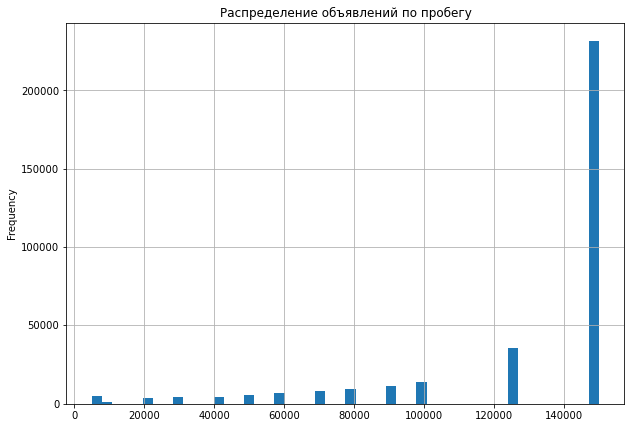

In [21]:
df.kilometer.plot(kind='hist',
                  bins=50, 
                  grid=True,
                  figsize=(10,7),
                  title='Распределение объявлений по пробегу')
plt.show()

Видим огномный выброс в районе 150 тыс. км. и скошенность графика влево.

Дополнительно выведем матрицу корреляций признаков и посмотрим на связь параметров:

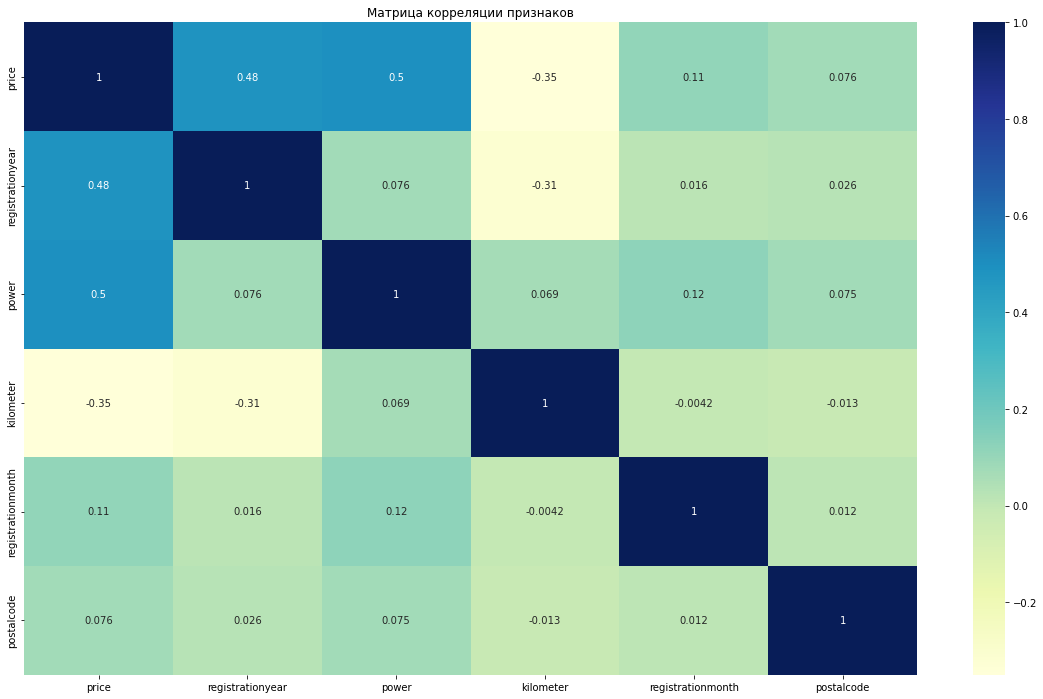

In [22]:
plt.figure(figsize=(20,12))
plt.title('Матрица корреляции признаков')

sns.heatmap(data=df.corr(),
            annot=True,
            cmap="YlGnBu")
plt.show()

Из матрицы видим, что цена в большей степени коррелирует с годом выпуска и мощностью двигателя (0,48 и 0,5) и имеет обратную зависимость от пробега (-0,35). 

In [23]:
print('Конечный датафрейм уменьшился на', df.shape[0]/data.shape[0]-1)

Конечный датафрейм уменьшился на -0.036814732665667704


* c помощью OrdinalEncoder преобразуем категориальные признаки

In [24]:
enc = OrdinalEncoder()

col_for_encoding = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired']
col_notfor_encoding = ['price', 'registrationyear', 'power', 'kilometer', 'registrationmonth', 'postalcode']

df_ordinal = enc.fit_transform(df[col_for_encoding])
df_ordinal = pd.DataFrame(df_ordinal, columns=col_for_encoding)
df_final = df_ordinal.join(df[col_notfor_encoding])

display(df_ordinal)
display(df[col_notfor_encoding])
display(df_final)

,vehicletype,gearbox,model,fueltype,brand,notrepaired
0,4.0,1.0,116.0,6.0,38.0,1.0
1,2.0,1.0,166.0,2.0,1.0,1.0
2,6.0,0.0,117.0,2.0,14.0,1.0
3,5.0,1.0,116.0,6.0,38.0,0.0
4,5.0,1.0,101.0,2.0,31.0,0.0
...,...,...,...,...,...,...
341318,4.0,1.0,78.0,6.0,22.0,1.0
341319,4.0,1.0,166.0,6.0,33.0,1.0
341320,1.0,0.0,106.0,6.0,32.0,0.0
341321,0.0,1.0,222.0,2.0,38.0,0.0


,price,registrationyear,power,kilometer,registrationmonth,postalcode
0,480,1993,0,150000,0,70435
1,18300,2011,190,125000,5,66954
2,9800,2004,163,125000,8,90480
3,1500,2001,75,150000,6,91074
4,3600,2008,69,90000,7,60437
...,...,...,...,...,...,...
341318,0,2005,0,150000,7,2694
341319,2200,2005,0,20000,1,39576
341320,1199,2000,101,125000,3,26135
341321,9200,1996,102,150000,3,87439


,vehicletype,gearbox,model,fueltype,brand,notrepaired,price,registrationyear,power,kilometer,registrationmonth,postalcode
0,4.0,1.0,116.0,6.0,38.0,1.0,480,1993,0,150000,0,70435
1,2.0,1.0,166.0,2.0,1.0,1.0,18300,2011,190,125000,5,66954
2,6.0,0.0,117.0,2.0,14.0,1.0,9800,2004,163,125000,8,90480
3,5.0,1.0,116.0,6.0,38.0,0.0,1500,2001,75,150000,6,91074
4,5.0,1.0,101.0,2.0,31.0,0.0,3600,2008,69,90000,7,60437
...,...,...,...,...,...,...,...,...,...,...,...,...
341318,4.0,1.0,78.0,6.0,22.0,1.0,0,2005,0,150000,7,2694
341319,4.0,1.0,166.0,6.0,33.0,1.0,2200,2005,0,20000,1,39576
341320,1.0,0.0,106.0,6.0,32.0,0.0,1199,2000,101,125000,3,26135
341321,0.0,1.0,222.0,2.0,38.0,0.0,9200,1996,102,150000,3,87439


**Вывод:**
1) Были рассмотрены выбросы в датафрейме по дате регистрации авто, мощности авто.

2) По дате регистрации выбросы за рамками 1990 и 2022 гг. были исключены, т.к. мы строим модель для "стандартного" автомобиля, а машины, регистрацией ранее 1990 года и "из будущего" (позже 2022г.в.) не подходят для этой цели.

3) Выбросы по мощности были ограничены диапазоном до 500 л.с., так как остальные - слишком выбивающие из выборки, нестандартные авто.

4) Гистограмма распределений по пробегу показала огномный выброс в районе 150 тыс. км. и скошенность графика влево.

5) Дополнительно была построена матрица корреляций признаков, которая показала, что цена в большей степени коррелирует с годом выпуска и мощностью двигателя (0,48 и 0,5) и имеет обратную зависимость от пробега (-0,35).

6) С помощью OrdinalEncoder были преобразованы категориальные признаки.

7) После "очистки" объем датафрейма сократился на - 3,7%

## Обучение моделей

1) разобьем датафрейм на тестовую и обучающую выборки


2) обучим несколько моделей:

* простейшую модель DummyRegressor
* линейной регрессии
* случайного леса
* градиентного бустинга средствами библиотек LightGBM и CatBoost
      
3) для каждой модели рассчитаем: 
* время обучения и предсказания
* RMSE на обучающей и тестовой выборках

In [44]:
# разделим фичи и целевой признак
target = df_final['price']
features = df_final.drop('price', axis=1)

# разобьем датафрейм на тестовую и обучающую выборки
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.25,
                                                                            random_state=1)
# создадим пустой словарь, в который запишем результаты работы моделей
results_dict = {'model':list(),
                'fit_time':list(),
                'score_time':list(),
                'train_neg_root_mean_squared_error':list(),
                'test_neg_root_mean_squared_error':list(),
                'test_r2':list()}

### Обучение Dummy-модели

* используем DummyRegressor для проверки качества предсказаний наших моделей

In [26]:
%%time
dummy = DummyRegressor(strategy='mean')

# кроссвалидацией вычислим метрику RMSE
dummy_results = cross_validate(estimator=dummy,
                               X=features,
                               y=target,
                               scoring=('r2','neg_root_mean_squared_error'),
                               cv=5,
                               return_train_score=True)

Wall time: 212 ms


In [27]:
print('Метрики качества предсказаний DummyRegressor-модели: \n')
print(f'Среднее время обучения 1 модели                 | {dummy_results["fit_time"].mean():.3f} с.')
print(f'Время предсказания и вычисления метрик качества | {dummy_results["score_time"].mean():.3f} с.')
print(f'RMSE на обучающей выборке                       | {dummy_results["train_neg_root_mean_squared_error"].mean()*-1:.3f} евро')
print(f'RMSE на тестовой выборке                        | {dummy_results["test_neg_root_mean_squared_error"].mean()*-1:.3f} евро')
print(f'R2 на тестовой выборке                          | {dummy_results["test_r2"].mean():.3f}')

Метрики качества предсказаний DummyRegressor-модели: 

Среднее время обучения 1 модели                 | 0.023 с.
Время предсказания и вычисления метрик качества | 0.002 с.
RMSE на обучающей выборке                       | 4506.657 евро
RMSE на тестовой выборке                        | 4506.649 евро
R2 на тестовой выборке                          | -0.000


### Обучение модели линейной регрессии

In [28]:
%%time
# присвоим объекту lin_model структуру данных LinearRegression()
lin_model = LinearRegression()

# кроссвалидацией вычислим метрику RMSE
lin_results = cross_validate(estimator=lin_model,
                             X=features,
                             y=target,
                             scoring=('r2','neg_root_mean_squared_error'),
                             cv=5,
                             return_train_score=True)

Wall time: 885 ms


In [29]:
print('Метрики качества предсказаний модели линейной регрессии: \n')
print(f'Среднее время обучения 1 модели                 | {lin_results["fit_time"].mean():.3f} с.')
print(f'Время предсказания и вычисления метрик качества | {lin_results["score_time"].mean():.3f} с.')
print(f'RMSE на обучающей выборке                       | {lin_results["train_neg_root_mean_squared_error"].mean()*-1:.3f} евро')
print(f'RMSE на тестовой выборке                        | {lin_results["test_neg_root_mean_squared_error"].mean()*-1:.3f} евро')
print(f'R2 на тестовой выборке                          | {lin_results["test_r2"].mean():.3f}')

Метрики качества предсказаний модели линейной регрессии: 

Среднее время обучения 1 модели                 | 0.133 с.
Время предсказания и вычисления метрик качества | 0.007 с.
RMSE на обучающей выборке                       | 2968.949 евро
RMSE на тестовой выборке                        | 2969.170 евро
R2 на тестовой выборке                          | 0.566


### Обучение модели случайного леса

In [30]:
%%time
# присвоим объекту lin_model структуру данных LinearRegression()
forest = RandomForestRegressor(random_state=1)

# кроссвалидацией вычислим метрику RMSE
forest_results = cross_validate(estimator=forest,
                                X=features,
                                y=target,
                                scoring=('r2','neg_root_mean_squared_error'),
                                cv=5,
                                return_train_score=True,
                                n_jobs =-1)

Wall time: 4min 6s


In [31]:
print('Метрики качества предсказаний модели RandomForest: \n')
print(f'Среднее время обучения 1 модели                 | {forest_results["fit_time"].mean():.3f} с.')
print(f'Время предсказания и вычисления метрик качества | {forest_results["score_time"].mean():.3f} с.')
print(f'RMSE на обучающей выборке                       | {forest_results["train_neg_root_mean_squared_error"].mean()*-1:.3f} евро')
print(f'RMSE на тестовой выборке                        | {forest_results["test_neg_root_mean_squared_error"].mean()*-1:.3f} евро')
print(f'R2 на тестовой выборке                          | {forest_results["test_r2"].mean():.3f}')

Метрики качества предсказаний модели RandomForest: 

Среднее время обучения 1 модели                 | 158.705 с.
Время предсказания и вычисления метрик качества | 33.678 с.
RMSE на обучающей выборке                       | 631.216 евро
RMSE на тестовой выборке                        | 1641.727 евро
R2 на тестовой выборке                          | 0.867


### Обучение модели CatBoost

In [32]:
%%time
ctb_model = CatBoostRegressor(loss_function='RMSE',
                              iterations=100,
                              random_state=1)

# кроссвалидацией вычислим метрику RMSE
ctb_results = cross_validate(estimator=ctb_model,
                             X=features,
                             y=target,
                             scoring=('r2','neg_root_mean_squared_error'),
                             cv=5,
                             return_train_score=True,
                             n_jobs =-1)

Wall time: 14.9 s


In [33]:
print('Метрики качества предсказаний модели RandomForest: \n')
print(f'Среднее время обучения 1 модели                 | {ctb_results["fit_time"].mean():.3f} с.')
print(f'Время предсказания и вычисления метрик качества | {ctb_results["score_time"].mean():.3f} с.')
print(f'RMSE на обучающей выборке                       | {ctb_results["train_neg_root_mean_squared_error"].mean()*-1:.3f} евро')
print(f'RMSE на тестовой выборке                        | {ctb_results["test_neg_root_mean_squared_error"].mean()*-1:.3f} евро')
print(f'R2 на тестовой выборке                          | {ctb_results["test_r2"].mean():.3f}')

Метрики качества предсказаний модели RandomForest: 

Среднее время обучения 1 модели                 | 9.931 с.
Время предсказания и вычисления метрик качества | 0.028 с.
RMSE на обучающей выборке                       | 1709.849 евро
RMSE на тестовой выборке                        | 1746.459 евро
R2 на тестовой выборке                          | 0.850


### Обучение модели LightGBM

In [34]:
%%time
lgbmr = LGBMRegressor(random_state=1)

# при помощи GridSearchCV подберем наилучшие гиперпараметры модели LGBMRegressor из предложенных в param_grid

# параметры, которые будем перебирать в GridSearchCV
parameters = {'num_leaves': [50, 100, 200],
              'max_depth': [15,20,25]}

# сам GridSearchCV. Целевой признак для оптимизации - 'neg_root_mean_squared_error'
gs = GridSearchCV(estimator=lgbmr,
                  param_grid=parameters,
                  scoring=('r2','neg_root_mean_squared_error'),
                  refit='neg_root_mean_squared_error',
                  cv=5,
                  return_train_score=True,
                  n_jobs =-1)

# передадим в модель фичи и целевой признак
gs.fit(features,
       target)

# запишем в словарь результаты работы наилучшей модели на тестовой выборке
lgbmr_results = {"fit_time": np.round(gs.cv_results_['mean_fit_time'].mean(), 3),
                 'score_time': np.round(gs.cv_results_['mean_score_time'].mean(), 3),
                 'train_neg_root_mean_squared_error': np.round(gs.cv_results_['mean_train_neg_root_mean_squared_error'].mean(), 3),
                 'test_neg_root_mean_squared_error': np.round(gs.cv_results_['mean_test_neg_root_mean_squared_error'].mean(), 3),
                 'test_r2': np.round(gs.cv_results_['mean_test_r2'].mean(), 3)
                }

Wall time: 1min 17s


In [35]:
print('Метрики качества предсказаний модели LightGBMRegressor: \n')
print(f'Среднее время обучения 1 модели                 | {lgbmr_results["fit_time"].mean():.3f} с.')
print(f'Время предсказания и вычисления метрик качества | {lgbmr_results["score_time"].mean():.3f} с.')
print(f'RMSE на обучающей выборке                       | {lgbmr_results["train_neg_root_mean_squared_error"].mean()*-1:.3f} евро')
print(f'RMSE на тестовой выборке                        | {lgbmr_results["test_neg_root_mean_squared_error"].mean()*-1:.3f} евро')
print(f'R2 на тестовой выборке                          | {lgbmr_results["test_r2"].mean():.3f}')

Метрики качества предсказаний модели LightGBMRegressor: 

Среднее время обучения 1 модели                 | 11.371 с.
Время предсказания и вычисления метрик качества | 1.268 с.
RMSE на обучающей выборке                       | 1613.187 евро
RMSE на тестовой выборке                        | 1697.755 евро
R2 на тестовой выборке                          | 0.858


## Анализ моделей

* циклом запишем результаты работы моделей в словарь, создадим датафрейм и выведем на экран

In [45]:
# список переменных с рузультатами моделей

mod = [dummy_results, lin_results, forest_results, ctb_results, lgbmr_results]
mod_name = ['DummyRegressor', 'LinearRegression', 'RandomForestRegressor', 'CatBoostRegressor', 'LightGBMRegressor']

for i in range(len(mod)):
    results_dict['model'].append(mod_name[i])
    results_dict['fit_time'].append(np.round(mod[i]["fit_time"].mean(), 3))
    results_dict['score_time'].append(np.round(mod[i]["score_time"].mean(), 3))
    results_dict['train_neg_root_mean_squared_error'].append(np.round(mod[i]["train_neg_root_mean_squared_error"].mean()*-1, 3))
    results_dict['test_neg_root_mean_squared_error'].append(np.round(mod[i]["test_neg_root_mean_squared_error"].mean()*-1, 3))
    results_dict['test_r2'].append(np.round(mod[i]["test_r2"].mean(), 3))
    
display(pd.DataFrame(results_dict))

,model,fit_time,score_time,train_neg_root_mean_squared_error,test_neg_root_mean_squared_error,test_r2
0,DummyRegressor,0.023,0.002,4506.657,4506.649,-0.000
1,LinearRegression,0.133,0.007,2968.949,2969.170,0.566
2,RandomForestRegressor,158.705,33.678,631.216,1641.727,0.867
3,CatBoostRegressor,9.931,0.028,1709.849,1746.459,0.850
4,LightGBMRegressor,11.371,1.268,1613.187,1697.755,0.858


1. Были рассмотрены 4 модели машинного обучения:
    * линейной регрессии
    * случайного леса
    * CatBoostRegressor
    * LightGBMRegressor

  Дополнительно построена Dummy-модель по среднему значению.


2. Анализ моделей показал:

    2.1 Результаты предсказаний модели линейной регрессии:
    * `RMSE цены` (ст. отклонение) на тестовой выборке - `2 969 евро`
    * `Коэффициент детерминации (R2)`, отражающий качество работы модели относительно Dummy-модели (предсказания по среднему), на уровне `0.566`.
    * `Время обучения и предсказаний модели` с применением кросс-валидации - `менее 1 с`.
    * Есть признаки переобучения, т.к. RMSE на обучающей и тестовых выборках очень близки.
    
    2.2 Результаты предсказаний модели случайного леса:
    * `RMSE цены` (ст. отклонение) на тестовой выборке - `1 641 евро`
    * `Коэффициент детерминации (R2)`, отражающий качество работы модели относительно Dummy-модели (предсказания по среднему), на уровне `0.867`.
    * `Время обучения - около 3 минут - предсказаний` с применением кросс-валидации - `около 33 с.`
    
    2.3 Результаты предсказаний модели CatBoostRegressor:
    * `RMSE цены` на тестовой выборке - `1 746 евро`
    * `Коэффициент детерминации (R2)`, отражающий качество работы модели относительно Dummy-модели (предсказания по среднему), на уровне `0.850`.
    * `Общее время обучения и предсказаний - менее 10 с.`
    
    2.4 Результаты предсказаний модели LightGBMRegressor:
    * `RMSE цены` на тестовой выборке - `1 698 евро`
    * `Коэффициент детерминации (R2)`, отражающий качество работы модели относительно Dummy-модели (предсказания по среднему), на уровне `0.858`.
    * `Общее время обучения и предсказаний - менее 15 с.`
    
    2.5 `RMSE Dummy-модели` на тестовой выборке - `4506.649 евро`


3. Видим, что наилучшей метрикой качества обладает модель случайного леса (RMSE - 1 641 евро) со средним временем обучения и предсказаний 1 модели около 3,5 минут. С точки зрения качества предсказаний далее идет LightGBMRegressor (RMSE - 1 698 евро), CatBoostRegressor (RMSE - 1 746 евро), линейная регрессия (RMSE - 2 969 евро). Время обучения соответственно <15 с., <10 с. и менее 1 с. 
    
    Таким образом можно сделать вывод что, несмотря на схожесть полученных результатов работы всех рассматриваемых моделей, время, затраченное на обучение и предсказания, может сильно отличаться. 
    
    Как итог, автором работы рекомендована модель LightGBMRegressor для определения стоимости автомобиля как наиболее оптимальная с точки зрения учета всех требований заказчика: скорость работы, качество предсказаний, время обучения.

## Итоги исследования

**Определение стоимости автомобилей** - исследовательский проект, целью которого являлось построить модель машинного обучения для определения стоимости автомобиля с учетом требований заказчика (скорость, качество предсказаний, время обучения).

Для достижения указанной цели были поставлены и решены следующие задачи:

1. На первом этапе были загружены, проанализированы и предобработаны исходные данные;


2. На втором этапе были обучены несколько моделей машинного обучения: DummyRegressor, линейная регрессия, случайный лес, CatBoostRegressor, LightGBMRegressor. Для каждой модели рассчитаны: время обучения и предсказания, RMSE на обучающей и тестовой выборках, R2-метрика для сравнения с Dummy-моделью.


3. Анализ моделей показал:

    3.1 Результаты предсказаний модели линейной регрессии:
    * `RMSE цены` (ст. отклонение) на тестовой выборке - `2 969 евро`
    * `Коэффициент детерминации (R2)`, отражающий качество работы модели относительно Dummy-модели (предсказания по среднему), на уровне `0.566`.
    * `Время обучения и предсказаний модели` с применением кросс-валидации - `менее 1 с`.
    * Есть признаки переобучения, т.к. RMSE на обучающей и тестовых выборках очень близки.
    
    3.2 Результаты предсказаний модели случайного леса:
    * `RMSE цены` (ст. отклонение) на тестовой выборке - `1 641 евро`
    * `Коэффициент детерминации (R2)`, отражающий качество работы модели относительно Dummy-модели (предсказания по среднему), на уровне `0.867`.
    * `Время обучения - около 3 минут - предсказаний` с применением кросс-валидации - `около 33 с.`
    
    3.3 Результаты предсказаний модели CatBoostRegressor:
    * `RMSE цены` на тестовой выборке - `1 746 евро`
    * `Коэффициент детерминации (R2)`, отражающий качество работы модели относительно Dummy-модели (предсказания по среднему), на уровне `0.850`.
    * `Общее время обучения и предсказаний - менее 10 с.`
    
    3.4 Результаты предсказаний модели LightGBMRegressor:
    * `RMSE цены` на тестовой выборке - `1 698 евро`
    * `Коэффициент детерминации (R2)`, отражающий качество работы модели относительно Dummy-модели (предсказания по среднему), на уровне `0.858`.
    * `Общее время обучения и предсказаний - менее 15 с.`
    
    3.5 `RMSE Dummy-модели` на тестовой выборке - `4 507 евро`


4. Наилучшую метрику качества показала модель случайного леса (RMSE - 1 641 евро) со средним временем обучения и предсказаний 1 модели около 3,5 минут. С точки зрения качества предсказаний далее идет LightGBMRegressor (RMSE - 1 698 евро), CatBoostRegressor (RMSE - 1 746 евро), линейная регрессия (RMSE - 2 969 евро). Время обучения соответственно <15 с., <10 с. и менее 1 с. 
    
    Таким образом можно сделать вывод что, несмотря на схожесть полученных результатов работы всех рассматриваемых моделей, время, затраченное на обучение и предсказания, может сильно отличаться. 
    
    Как итог, автором работы рекомендована модель LightGBMRegressor для определения стоимости автомобиля как наиболее оптимальная с точки зрения учета всех требований заказчика: скорость работы, качество предсказаний, время обучения.